LAB 5: Wide and Deep Network Architectures

Jocelyn Rupp and Julia Rushton 

# Dataset Selection

Select a dataset similarly to lab one. That is, the dataset must be table data and must have categorical features. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression. You are NOT allowed to use the census (i.e., Adult) dataset that was given as an example in class. 

# Preparation

In [193]:
import pandas as pd

In [194]:
import numpy as np

In [195]:
data_path = 'collision-data.csv'
df = pd.read_csv(data_path)

df.head()

Unnamed: 0   longitude   latitude  SEVERITYCODE COLLISIONTYPE  PERSONCOUNT  \
0           1 -122.324322  47.613755             0    Parked Car            2   
1           2 -122.321556  47.571558             0    Rear Ended            3   
2           3 -122.344164  47.555769             1       Head On            2   
3           4 -122.309400  47.608484             1    Rear Ended            2   
4           5 -122.319746  47.674521             0     Left Turn            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  ...           response_type  \
0         0            0         2         0  ...                     NaN   
1         0            0         3         0  ...                     NaN   
2         0            0         2         1  ...                     NaN   
3         0            0         2         1  ...  Motor Vehicle Accident   
4         0            0         2         0  ...                     NaN   

   response_time AWND  PRCP  SNOW SNWD  TAVG  TMAX  TMIN  WSF5  
0            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
1            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
2            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
3           36.0  9.4   0.0   NaN  NaN  33.0    38    27  17.0  
4            NaN  9.4   0.0   NaN  NaN  33.0    38    27  17.0  

[5 rows x 34 columns]

In [196]:
df["SEVERITYCODE"].value_counts()

0    71979
1    37804
2     1909
3      190
Name: SEVERITYCODE, dtype: int64

# Pre-processing

The dataset selected is called “Vehicle collision data in Seattle 2005 - 2019”. This dataset contains information regarding the location, severity, climate, date, time, and emergency response time for car accidents in Seattle, Washington. This dataset is a collection of data from both Seattle’s open data portal about car accidents reported in the city and from the National Oceanic and Atmospheric Administration’s (NOAA) data tools. Data from these two sources were combined to form the Vehicle collision data in Seattle 2005 - 2019 dataset. Seattle tracks information about all car accidents because they have to have every incident on record for legal purposes. The NOAA is a science - based federal agency that is responsible for tracking and forecasting weather, oceanic conditions and atmospheric conditions. So, the information in the dataset being used in this lab regarding weather conditions is from the NOAA.

In [197]:
# Remove attributes that arent useful for us
df.drop(['WSF5','TMIN','TMAX', 'SNOW', 'SNWD', 'response_type', 'JUNCTIONTYPE', 'response_time'], axis = 1, inplace = True)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  INATTENTIONIND        111882 non-null  bool   
 13  UNDERINFL             111882 non-null  bool   
 14  WEATHER               111882 non-null  object 
 15  

In [198]:
# preprocessing of numeric variables
import pandas as pd
from sklearn.preprocessing import StandardScaler


print(df.columns)

unnecessary_columns = ['Unnamed: 0', 'SPDCASENO', 'DATE', 'TIME']
df.drop(unnecessary_columns, axis=1, errors='ignore', inplace=True)

bool_cols = ["INATTENTIONIND", "UNDERINFL", "SPEEDING", "HITPARKEDCAR", "intersection_related", "LIGHTCOND"]
df[bool_cols] = df[bool_cols].astype(str)


variable_types = {}
numeric_cols = ['longitude', 'latitude', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
                'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'AWND', 'PRCP', 'TAVG']
for col in df.columns:
    if col in numeric_cols:
        variable_types[col] = 'Numeric'
    else:
        variable_types[col] = 'Categorical'

final_dataset_description = df.describe()

print("Variable Types:")
for col, v_type in variable_types.items():
    print(f"{col}: {v_type}")

print("\nFinal Dataset Description:")
print(final_dataset_description)

Index(['Unnamed: 0', 'longitude', 'latitude', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR',
       'SPDCASENO', 'DATE', 'TIME', 'intersection_related', 'AWND', 'PRCP',
       'TAVG'],
      dtype='object')
Variable Types:
longitude: Numeric
latitude: Numeric
SEVERITYCODE: Categorical
COLLISIONTYPE: Categorical
PERSONCOUNT: Numeric
PEDCOUNT: Numeric
PEDCYLCOUNT: Numeric
VEHCOUNT: Numeric
INJURIES: Numeric
SERIOUSINJURIES: Numeric
FATALITIES: Numeric
INATTENTIONIND: Categorical
UNDERINFL: Categorical
WEATHER: Categorical
ROADCOND: Categorical
LIGHTCOND: Categorical
SPEEDING: Categorical
HITPARKEDCAR: Categorical
intersection_related: Categorical
AWND: Numeric
PRCP: Numeric
TAVG: Numeric

Final Dataset Description:
           longitude       latitude   SEVERITYCODE    PERSONCOUNT  \
count  

The above block of code is the final dataset description with numeric and categorical variables. Important variable to take note of is severity code which classifies an accident as a 0,1,2,3 in relation to injury severity.

Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed). 

Our three groups that we combined for cross-product features are listen below:
Group 1:INATTENTIONIND and Collision type
Group 2: Weather and Road Condition
Group 3: Speeding Under the influence

(note: we received errors grouping more than 2 columns/variables)

For group 1, INATTENTIONIND classifies whether the driver was not paying full attention. When this is combined with the type of collision, the model can better understand patterns of how inattention contributes to specific types of accidents. For example, inattention might be more likely to lead to rear-end collisions due to delayed reaction times. This cross-product features should be done because it helps the model learn the dependency between the driver's attention state and the collision outcomes, which is necessaryfor predicting collision severity or even researching preventive measures.

For group 2, Weather and road conditions are directly related. Certain types of weather, like rain or snow, can lead to specific road conditions like wet or icy surfaces. Crossing these features allows the model to directly learn from specific combinations of weather and road conditions which are more likely to contribute to accidents. This cross-product features should be used because the model will be able to predict accidents considering road and weather condition. 

For group 3, speeding and under the influence should be cross-product features because both are very high-risk behavior. Understanding that you are more likely to be driving recklessy while under the influence. This model is necessary for understanding potential severe situations. Crossing these features are necessary for finding preventive measures.

Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

We used macro recall to evaluate our algorithms performance. This evaluation metric is approriate for our data set because when it comes to car accidents and details surrounding fatalities it would be terrible to classify an accident with a severity code of 3 incorrectly. Macro recall is necessary because we want to mitigate false positives. More specifically for the business case, considering the police needing accident reports, the macro recall ensures that each condition is detected accurately. For datasets involving multiple features like weather, road conditions, and driver behaviors, macro recall allows you to verify that the model performs well across all types of conditions and not just the most common ones.

Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for. 

We believed that out data set is sufficiently large and does not need to use cross validation for proving. We are using a basic 80/20 split for training and testing.  The data set has 111881 entries after cleaning. This efficient use of the data is realistic mirroring of how an algorithm would be used in practice because it maximizes the learning potential.  The large amount of training data helps in better parameter tuning and model stability, reducing the likelihood of overfitting, especially if the model is complex.


In [199]:
from sklearn.model_selection import train_test_split
import plotly

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify = df['SEVERITYCODE'])

# Modeling

In [200]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import tensorflow.keras as keras

batch_size = 64

def create_dataset_from_dataframe(df_input, outcome):

    df = df_input.copy()
    labels = keras.utils.to_categorical(df[outcome])

    df = {key: value.values[:,np.newaxis] for key, value in df_input[[col for col in df.columns if col != outcome]].items()}

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds

ds_train = create_dataset_from_dataframe(df_train, "SEVERITYCODE")
ds_test = create_dataset_from_dataframe(df_test, "SEVERITYCODE")

 Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. 
Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.

In [201]:
from tensorflow.keras.utils import FeatureSpace

# Example One: Just lump everything together, and concatenate
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        ##CHANGE
        "COLLISIONTYPE": FeatureSpace.string_categorical(num_oov_indices=0),
        "INATTENTIONIND": FeatureSpace.string_categorical(num_oov_indices=0),
        "UNDERINFL": FeatureSpace.string_categorical(num_oov_indices=0),
        "WEATHER": FeatureSpace.string_categorical(num_oov_indices=0),
        "ROADCOND": FeatureSpace.string_categorical(num_oov_indices=0),
        "LIGHTCOND": FeatureSpace.string_categorical(num_oov_indices=0),
        "HITPARKEDCAR": FeatureSpace.string_categorical(num_oov_indices=0),
        "SPEEDING": FeatureSpace.string_categorical(num_oov_indices=0),
        "intersection_related": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numeric features
        "longitude": FeatureSpace.float_normalized(),
        "latitude": FeatureSpace.float_normalized(),
        "PERSONCOUNT": FeatureSpace.float_normalized(),
        "PEDCOUNT": FeatureSpace.float_normalized(),
        "PEDCYLCOUNT": FeatureSpace.float_normalized(),
        "VEHCOUNT": FeatureSpace.float_normalized(),
        "INJURIES": FeatureSpace.float_normalized(),
        "SERIOUSINJURIES": FeatureSpace.float_normalized(),
        "FATALITIES": FeatureSpace.float_normalized(),
        "AWND": FeatureSpace.float_normalized(),
        "PRCP": FeatureSpace.float_normalized(),
        "TAVG": FeatureSpace.float_normalized()        
    },
    
    # Specify feature cross with a custom crossing dim
    # Severity Code and Collision Type
    # Group 1: Inattention when driving and collision type
    # Group 2: Weather and Road
    # Group 3: Speeding, Underthe influence
    # NROADCOND', 'LIGHTCOND', 'SPEEDING'
    crosses=[
        FeatureSpace.cross(
            feature_names=('INATTENTIONIND','COLLISIONTYPE'),  
            crossing_dim=2*9),
        FeatureSpace.cross(
            feature_names=('WEATHER', 'ROADCOND'), 
            crossing_dim=8*7),
        FeatureSpace.cross(
            feature_names=('SPEEDING','UNDERINFL'),
            crossing_dim=2*2),
    ],
    output_mode="concat", # can also be a dict, processed internally
)

In [202]:
# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
feature_space.adapt(train_ds_with_no_labels)

In [203]:
# code source: note book 10a
from tensorflow.keras.layers import Embedding, Flatten

def setup_embedding_from_categorical(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 
        
def setup_embedding_from_crossing(feature_space, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

In [204]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

numeric_headers = list(filter(lambda x: variable_types[x] == "Numeric", variable_types.keys()))
categorical_headers = list(filter(lambda x: variable_types[x] == "Categorical" and x != "SEVERITYCODE", variable_types.keys()))

# Model 1:

/Users/Jocelyn/anaconda3/envs/JRenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,564 (13.97 KB)

 Trainable params: 3,528 (13.78 KB)

 Non-trainable params: 36 (192.00 B)

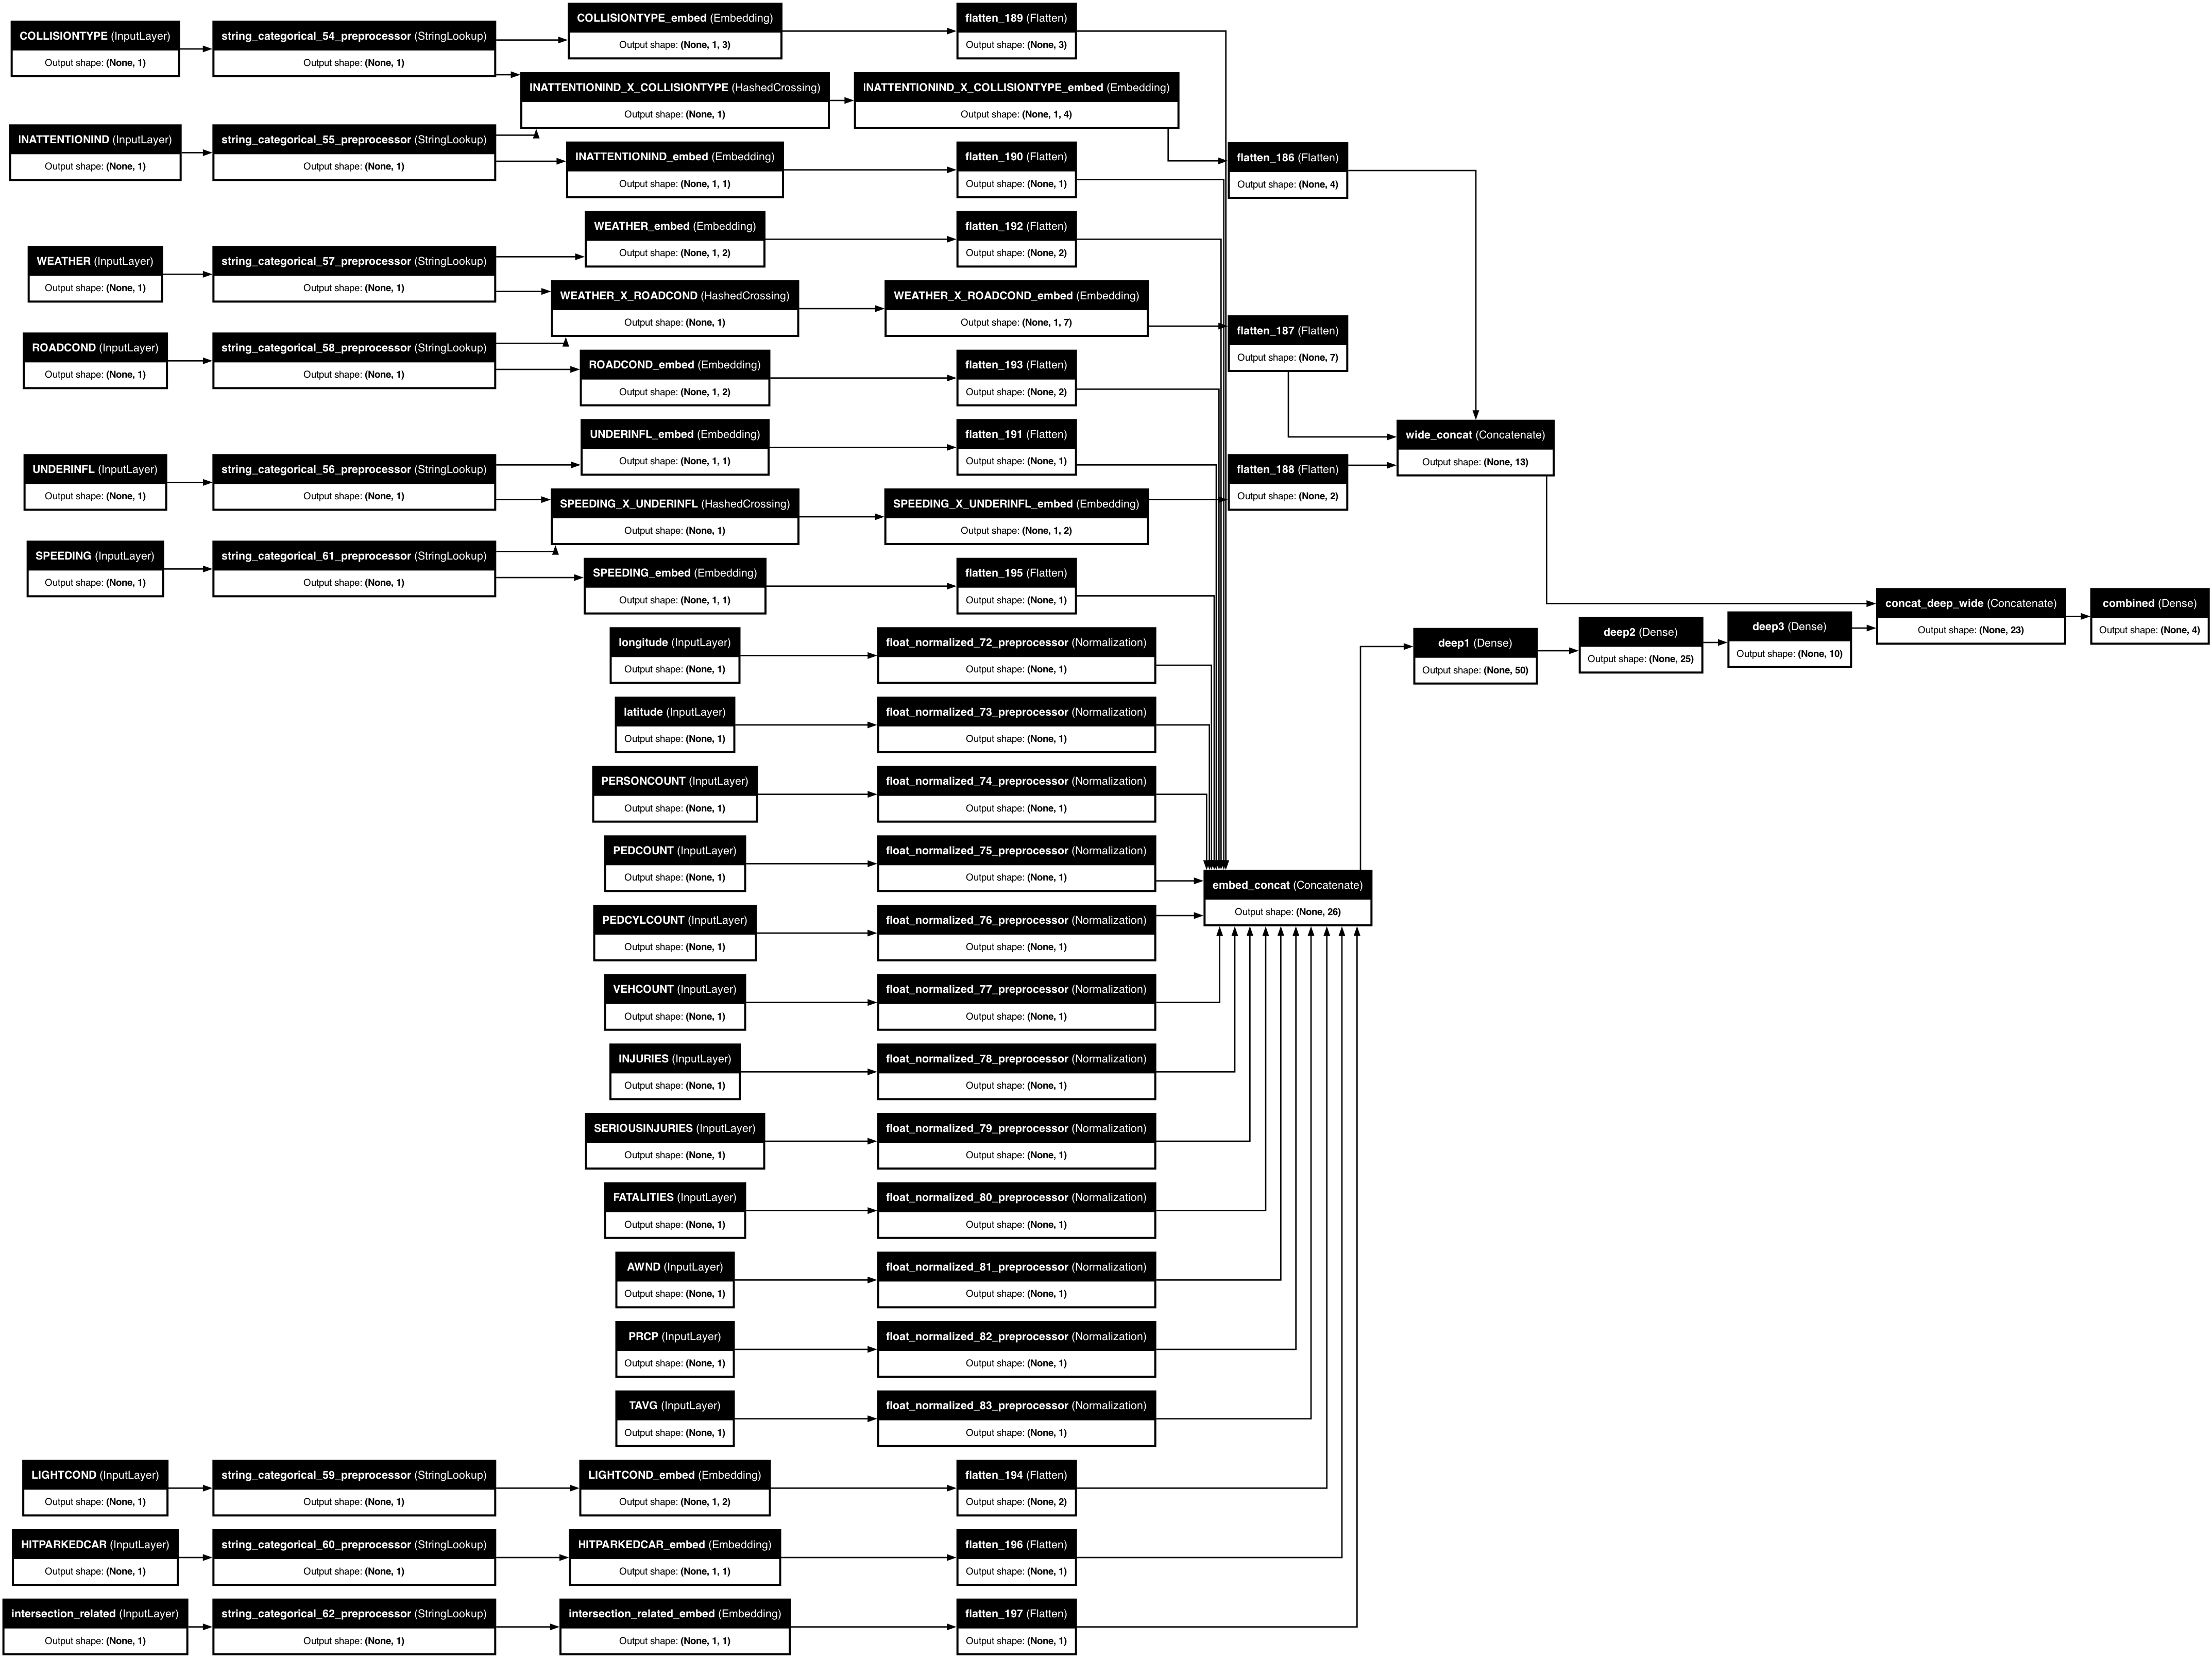

In [205]:
dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    # x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=4,activation='softmax',
                     name='combined')(final_branch)

training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model.summary()

plot_model(
    training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [206]:
# saving each loss function at each epoch
history = training_model.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10


1399/1399 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9341 - loss: 0.2450 - val_accuracy: 1.0000 - val_loss: 2.0747e-04
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 4.6477e-04 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 7.7338e-04 - val_accuracy: 1.0000 - val_loss: 1.4727e-05
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.1112e-05 - val_accuracy: 1.0000 - val_loss: 6.7131e-06
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 4.9169e-06 - val_accuracy: 1.0000 - val_loss: 3.5109e-06
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.3377e-06 - val_accuracy: 1.0000 - val_loss: 1.8385e-06
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.1207e-06 - val_accuracy: 1.0000 - val_loss: 9.6213e-07
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

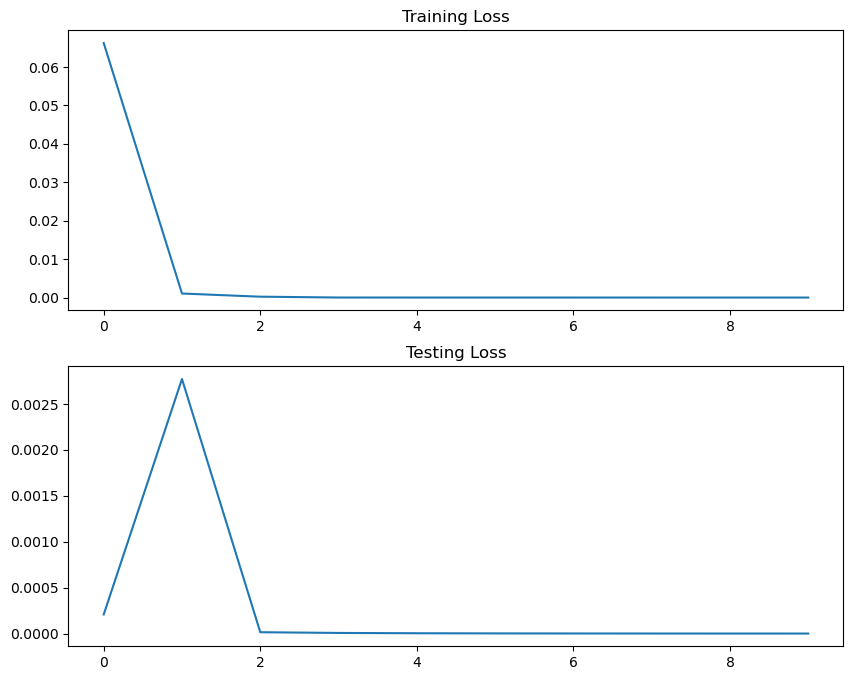

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [208]:
import sklearn.metrics as mt

pred = training_model.predict(ds_test)
yhat = np.argmax(pred, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat))
mt.recall_score(df_test["SEVERITYCODE"], yhat, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

# Model 2:

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,599 (14.11 KB)

 Trainable params: 3,563 (13.92 KB)

 Non-trainable params: 36 (192.00 B)

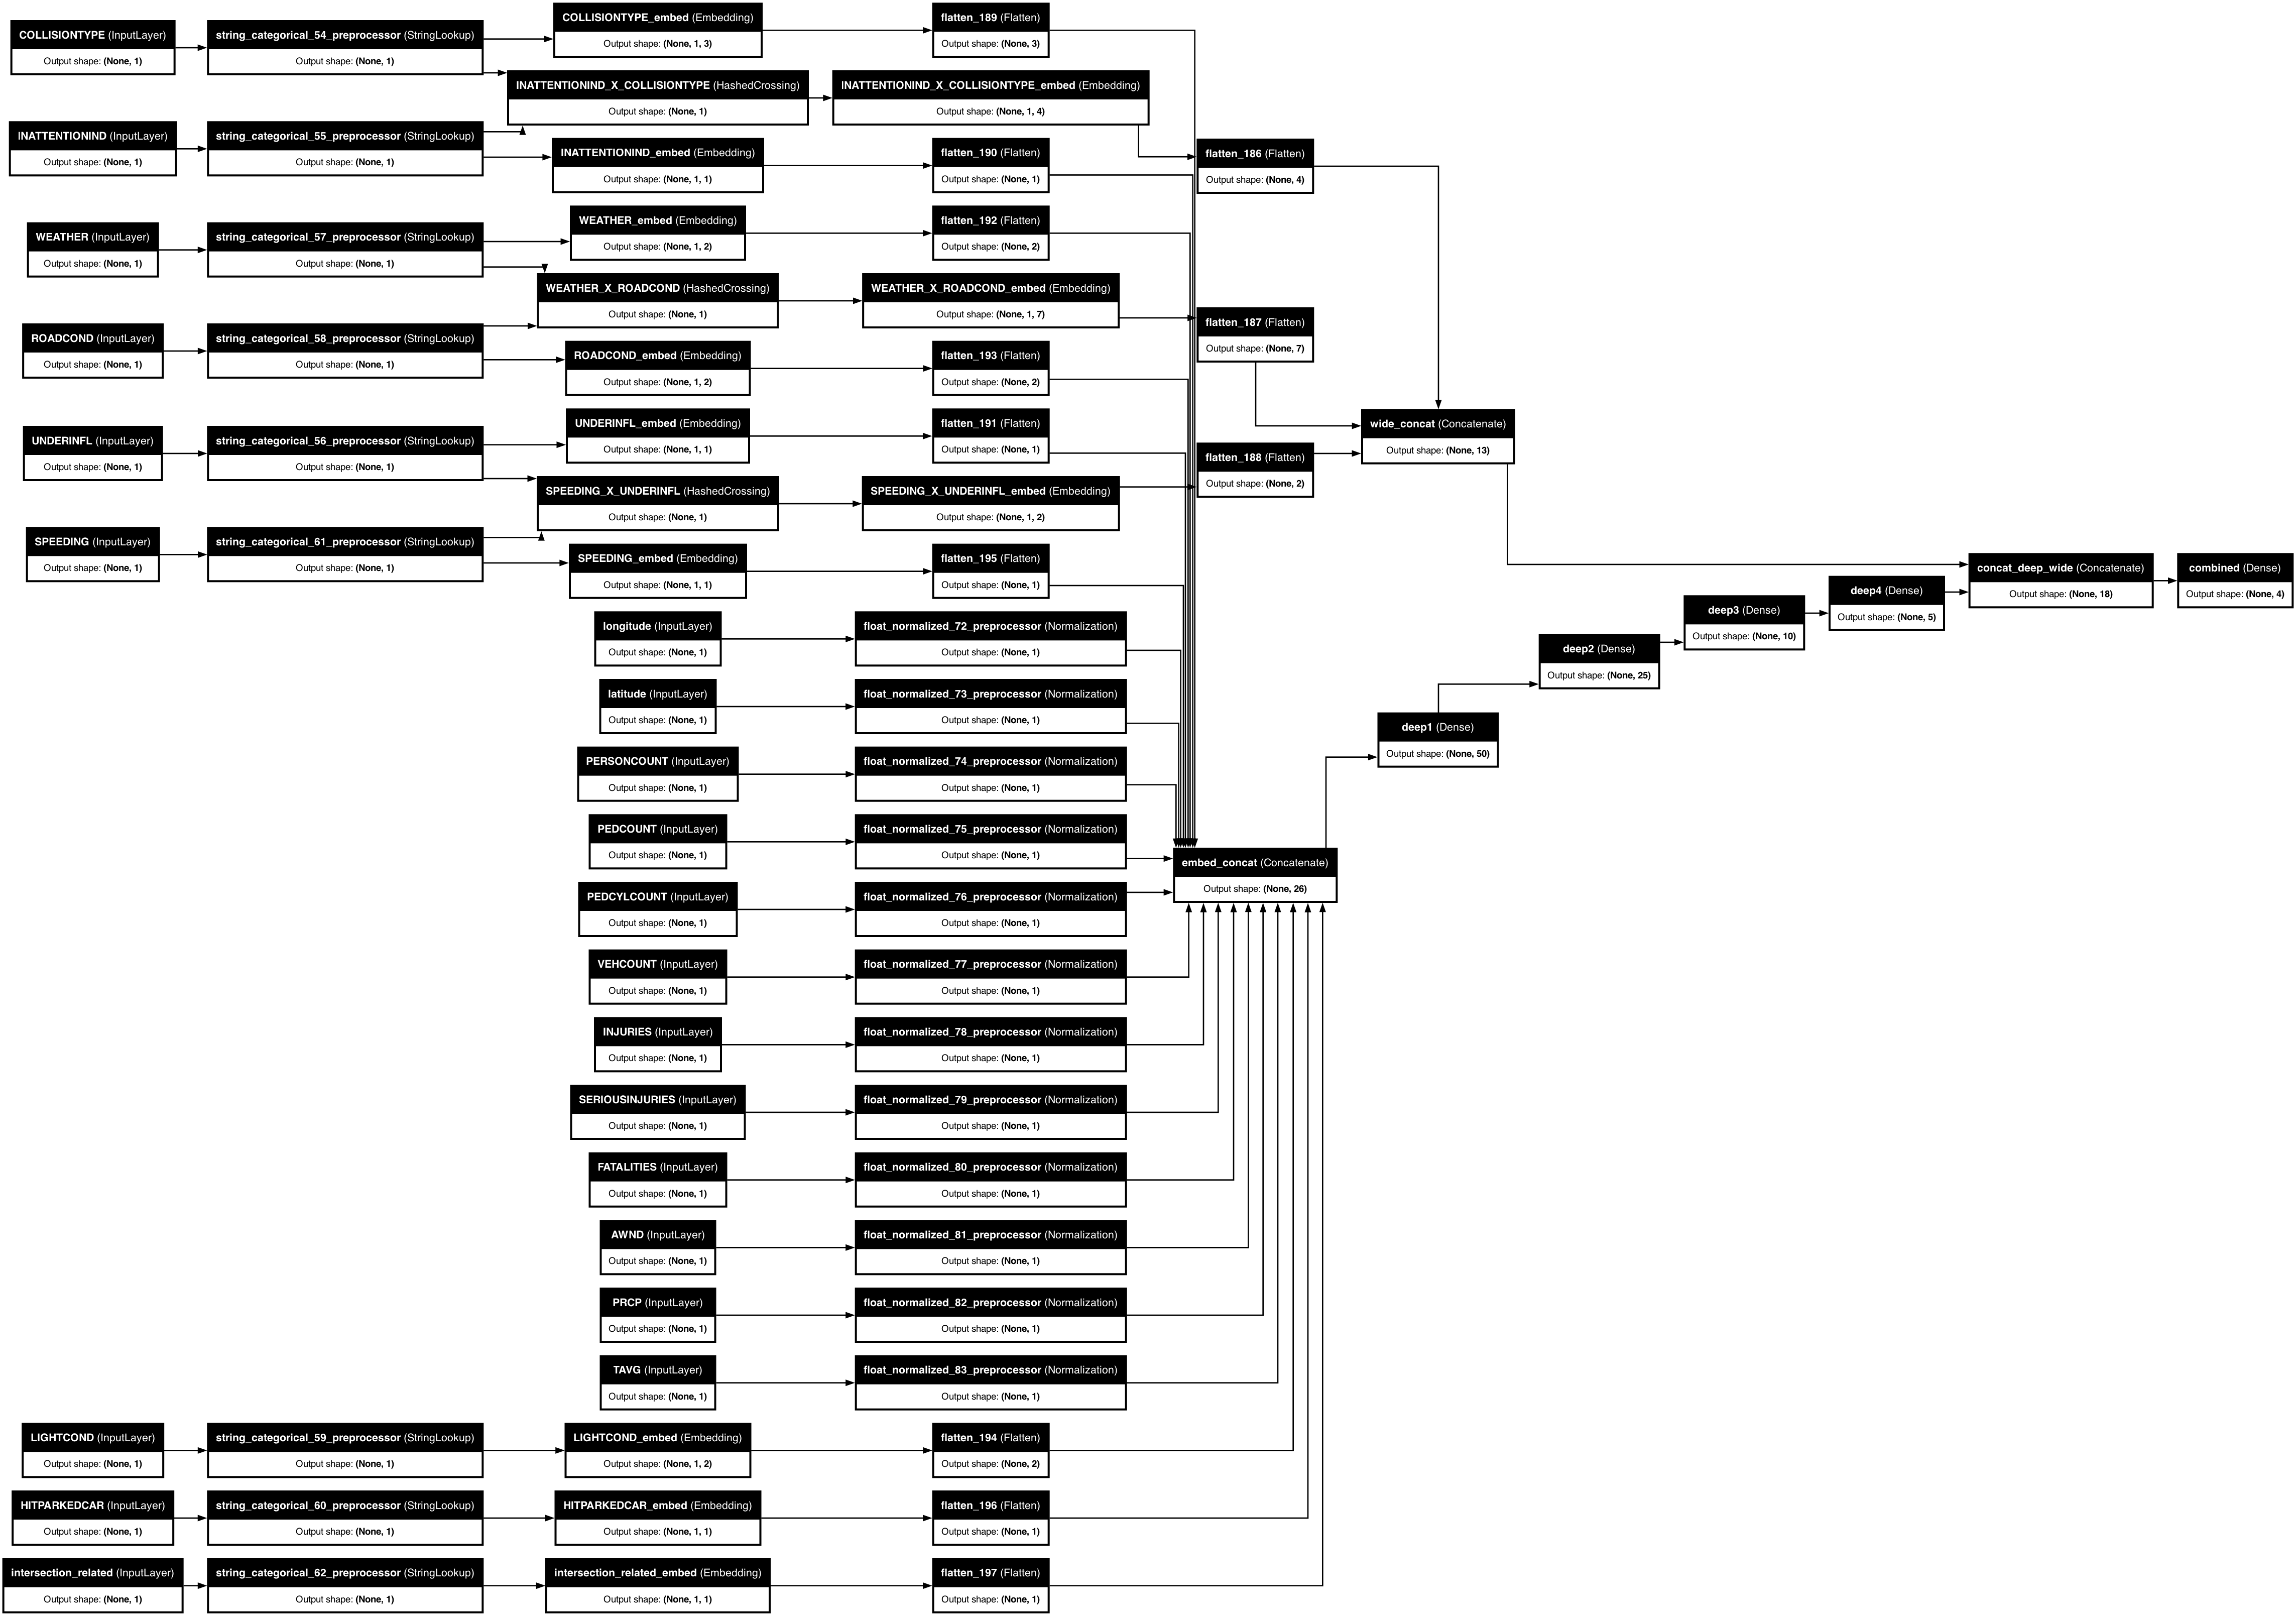

In [209]:
deep_branch2 = deep_branch
deep_branch2 = Dense(units=5,activation='relu', name='deep4')(deep_branch2)

# merge the deep and wide branch
final_branch2 = Concatenate(name='concat_deep_wide')([deep_branch2, wide_branch])
final_branch2 = Dense(units=4,activation='softmax',
                     name='combined')(final_branch2)

training_model2 = keras.Model(inputs=dict_inputs, outputs=final_branch2)
training_model2.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model2.summary()

plot_model(
    training_model2, to_file='model2.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [210]:
# saving each loss function at each epoch
history2 = training_model2.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9320 - loss: 0.2100 - val_accuracy: 0.9998 - val_loss: 9.0958e-04
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 8.8865e-04 - val_accuracy: 1.0000 - val_loss: 6.6353e-05
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.1150e-04 - val_accuracy: 1.0000 - val_loss: 2.3980e-05
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.3955e-05 - val_accuracy: 1.0000 - val_loss: 1.2759e-05
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 4.9372e-06 - val_accuracy: 1.0000 - val_loss: 8.6947e-06
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.3477e-06 - val_accuracy: 1.0000 - val_loss: 6.2235e-06
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.1935e-06 - val_accuracy: 1.0000 - val_loss: 4.2021e-06
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━

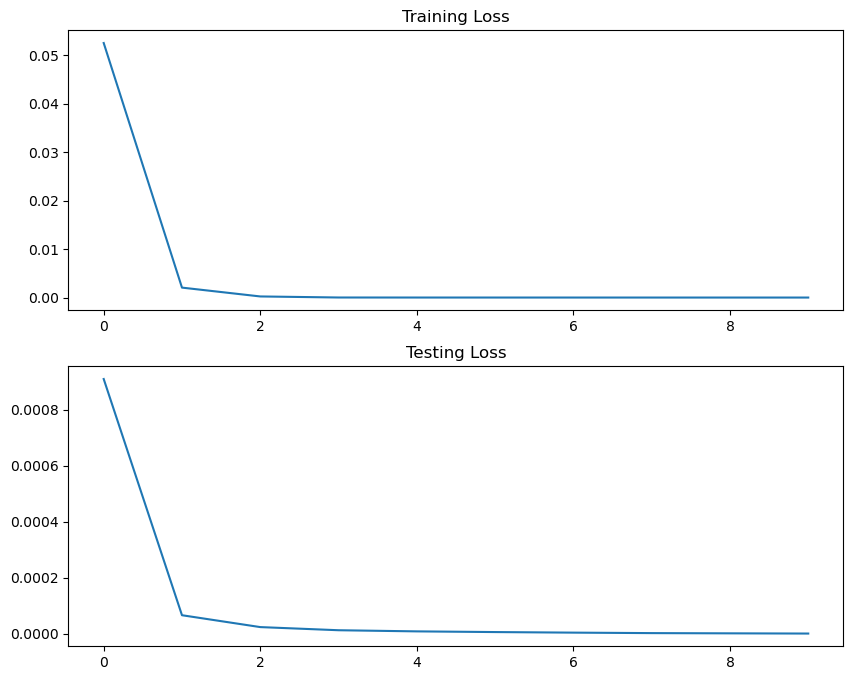

In [211]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history2.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history2.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [212]:
pred2 = training_model2.predict(ds_test)
yhat2 = np.argmax(pred2, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat2))
mt.recall_score(df_test["SEVERITYCODE"], yhat2, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

# Model 3:

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,711 (14.54 KB)

 Trainable params: 3,675 (14.36 KB)

 Non-trainable params: 36 (192.00 B)

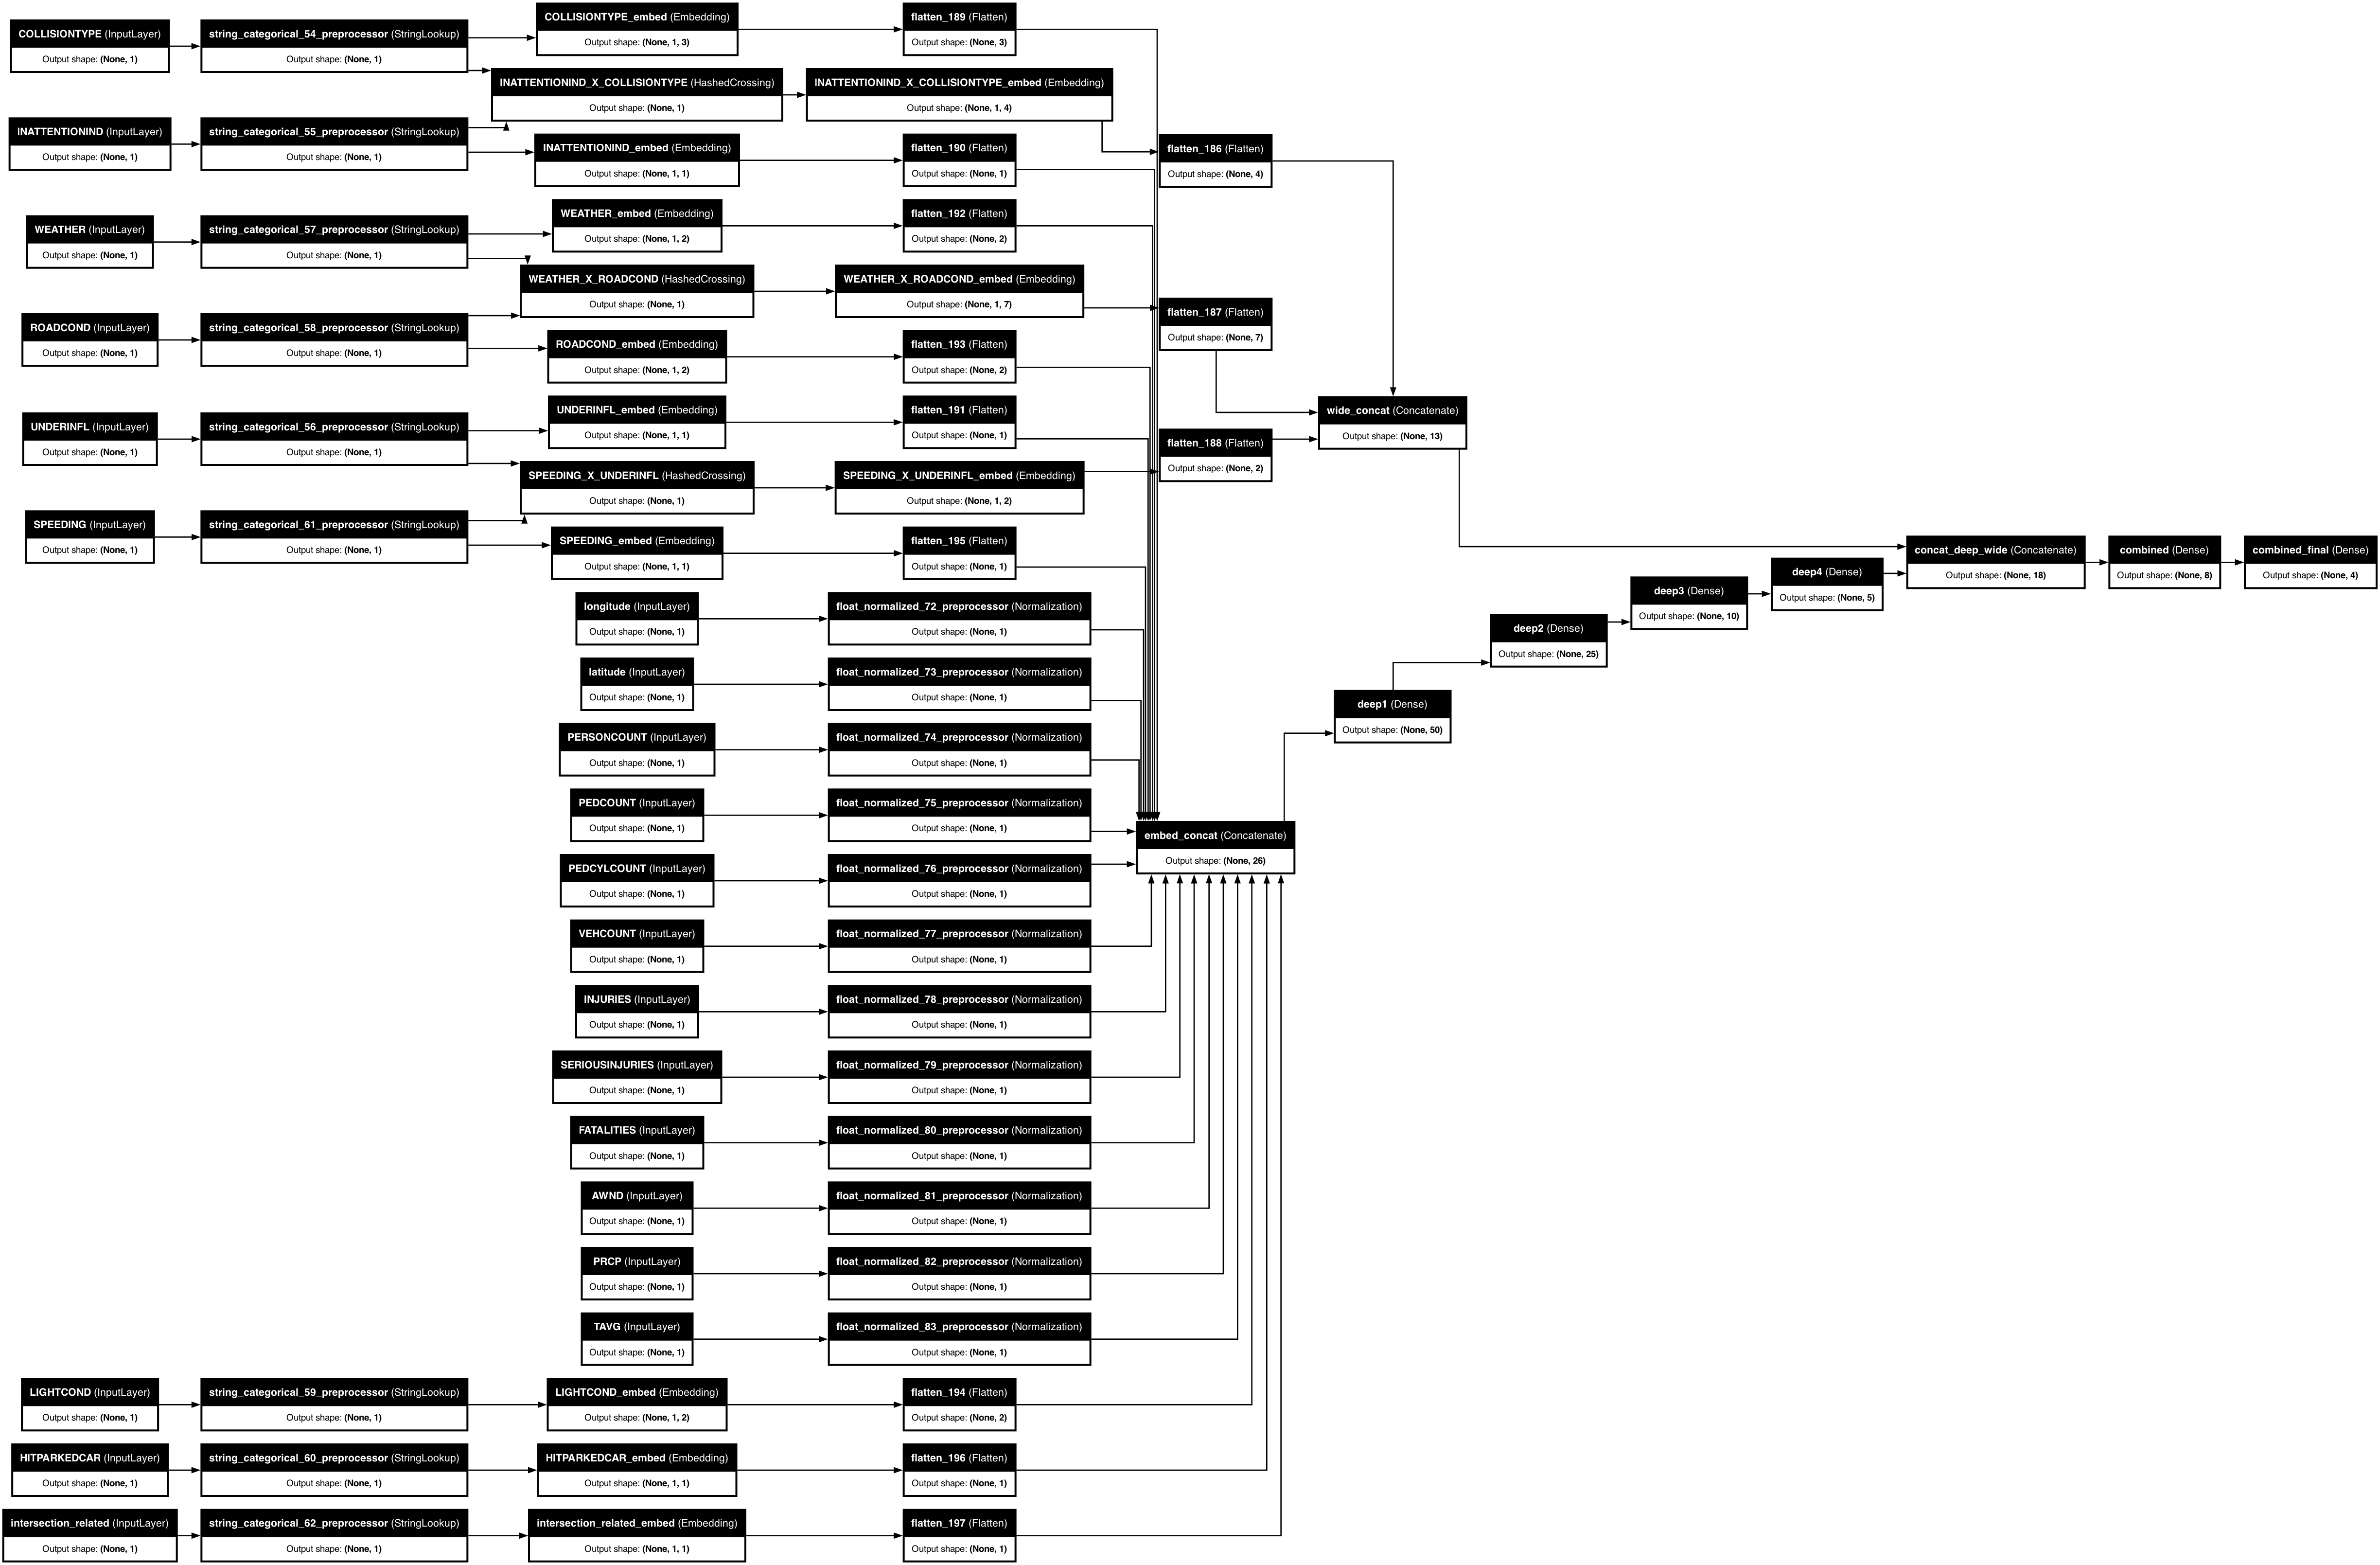

In [213]:
# merge the deep and wide branch
final_branch3 = Concatenate(name='concat_deep_wide')([deep_branch2, wide_branch])
final_branch3 = Dense(units=8,activation='relu',
                     name='combined')(final_branch3)
final_branch3 = Dense(units=4,activation='softmax',
                     name='combined_final')(final_branch3)

training_model3 = keras.Model(inputs=dict_inputs, outputs=final_branch3)
training_model3.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model3.summary()

plot_model(
    training_model3, to_file='model3.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [214]:
# saving each loss function at each epoch
history3 = training_model3.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8951 - loss: 2.2295 - val_accuracy: 0.9983 - val_loss: 0.0098
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 9.4550e-04
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 8.8290e-04 - val_accuracy: 1.0000 - val_loss: 2.5867e-04
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.4920e-04 - val_accuracy: 1.0000 - val_loss: 9.7759e-05
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.2648e-04 - val_accuracy: 1.0000 - val_loss: 3.8289e-05
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 6.2518e-05 - val_accuracy: 1.0000 - val_loss: 2.0237e-05
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 4.4831e-05 - val_accuracy: 1.0000 - val_loss: 1.1481e-05
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2

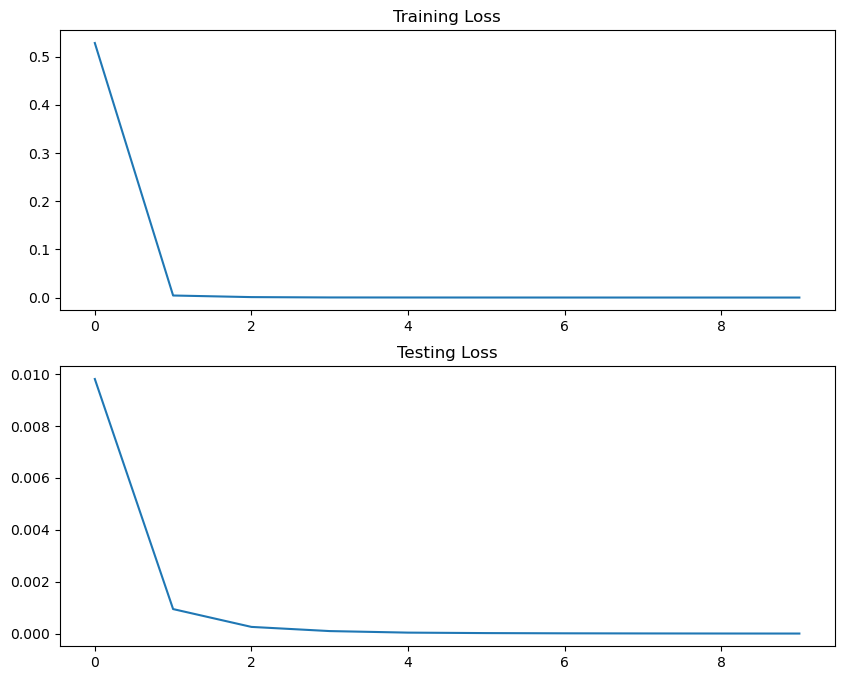

In [215]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history3.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history3.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [216]:
pred3 = training_model3.predict(ds_test)
yhat3 = np.argmax(pred3, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat3))
mt.recall_score(df_test["SEVERITYCODE"], yhat3, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

# Model 4

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ COLLISIONTYPE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HITPARKEDCAR        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ intersection_relat… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ COLLISIONTYPE[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ INATTENTIONIND[0… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ UNDERINFL[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ WEATHER[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ ROADCOND[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ LIGHTCOND[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ SPEEDING[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ HITPARKEDCAR[0][

 Total params: 3,040 (11.92 KB)

 Trainable params: 3,004 (11.73 KB)

 Non-trainable params: 36 (192.00 B)

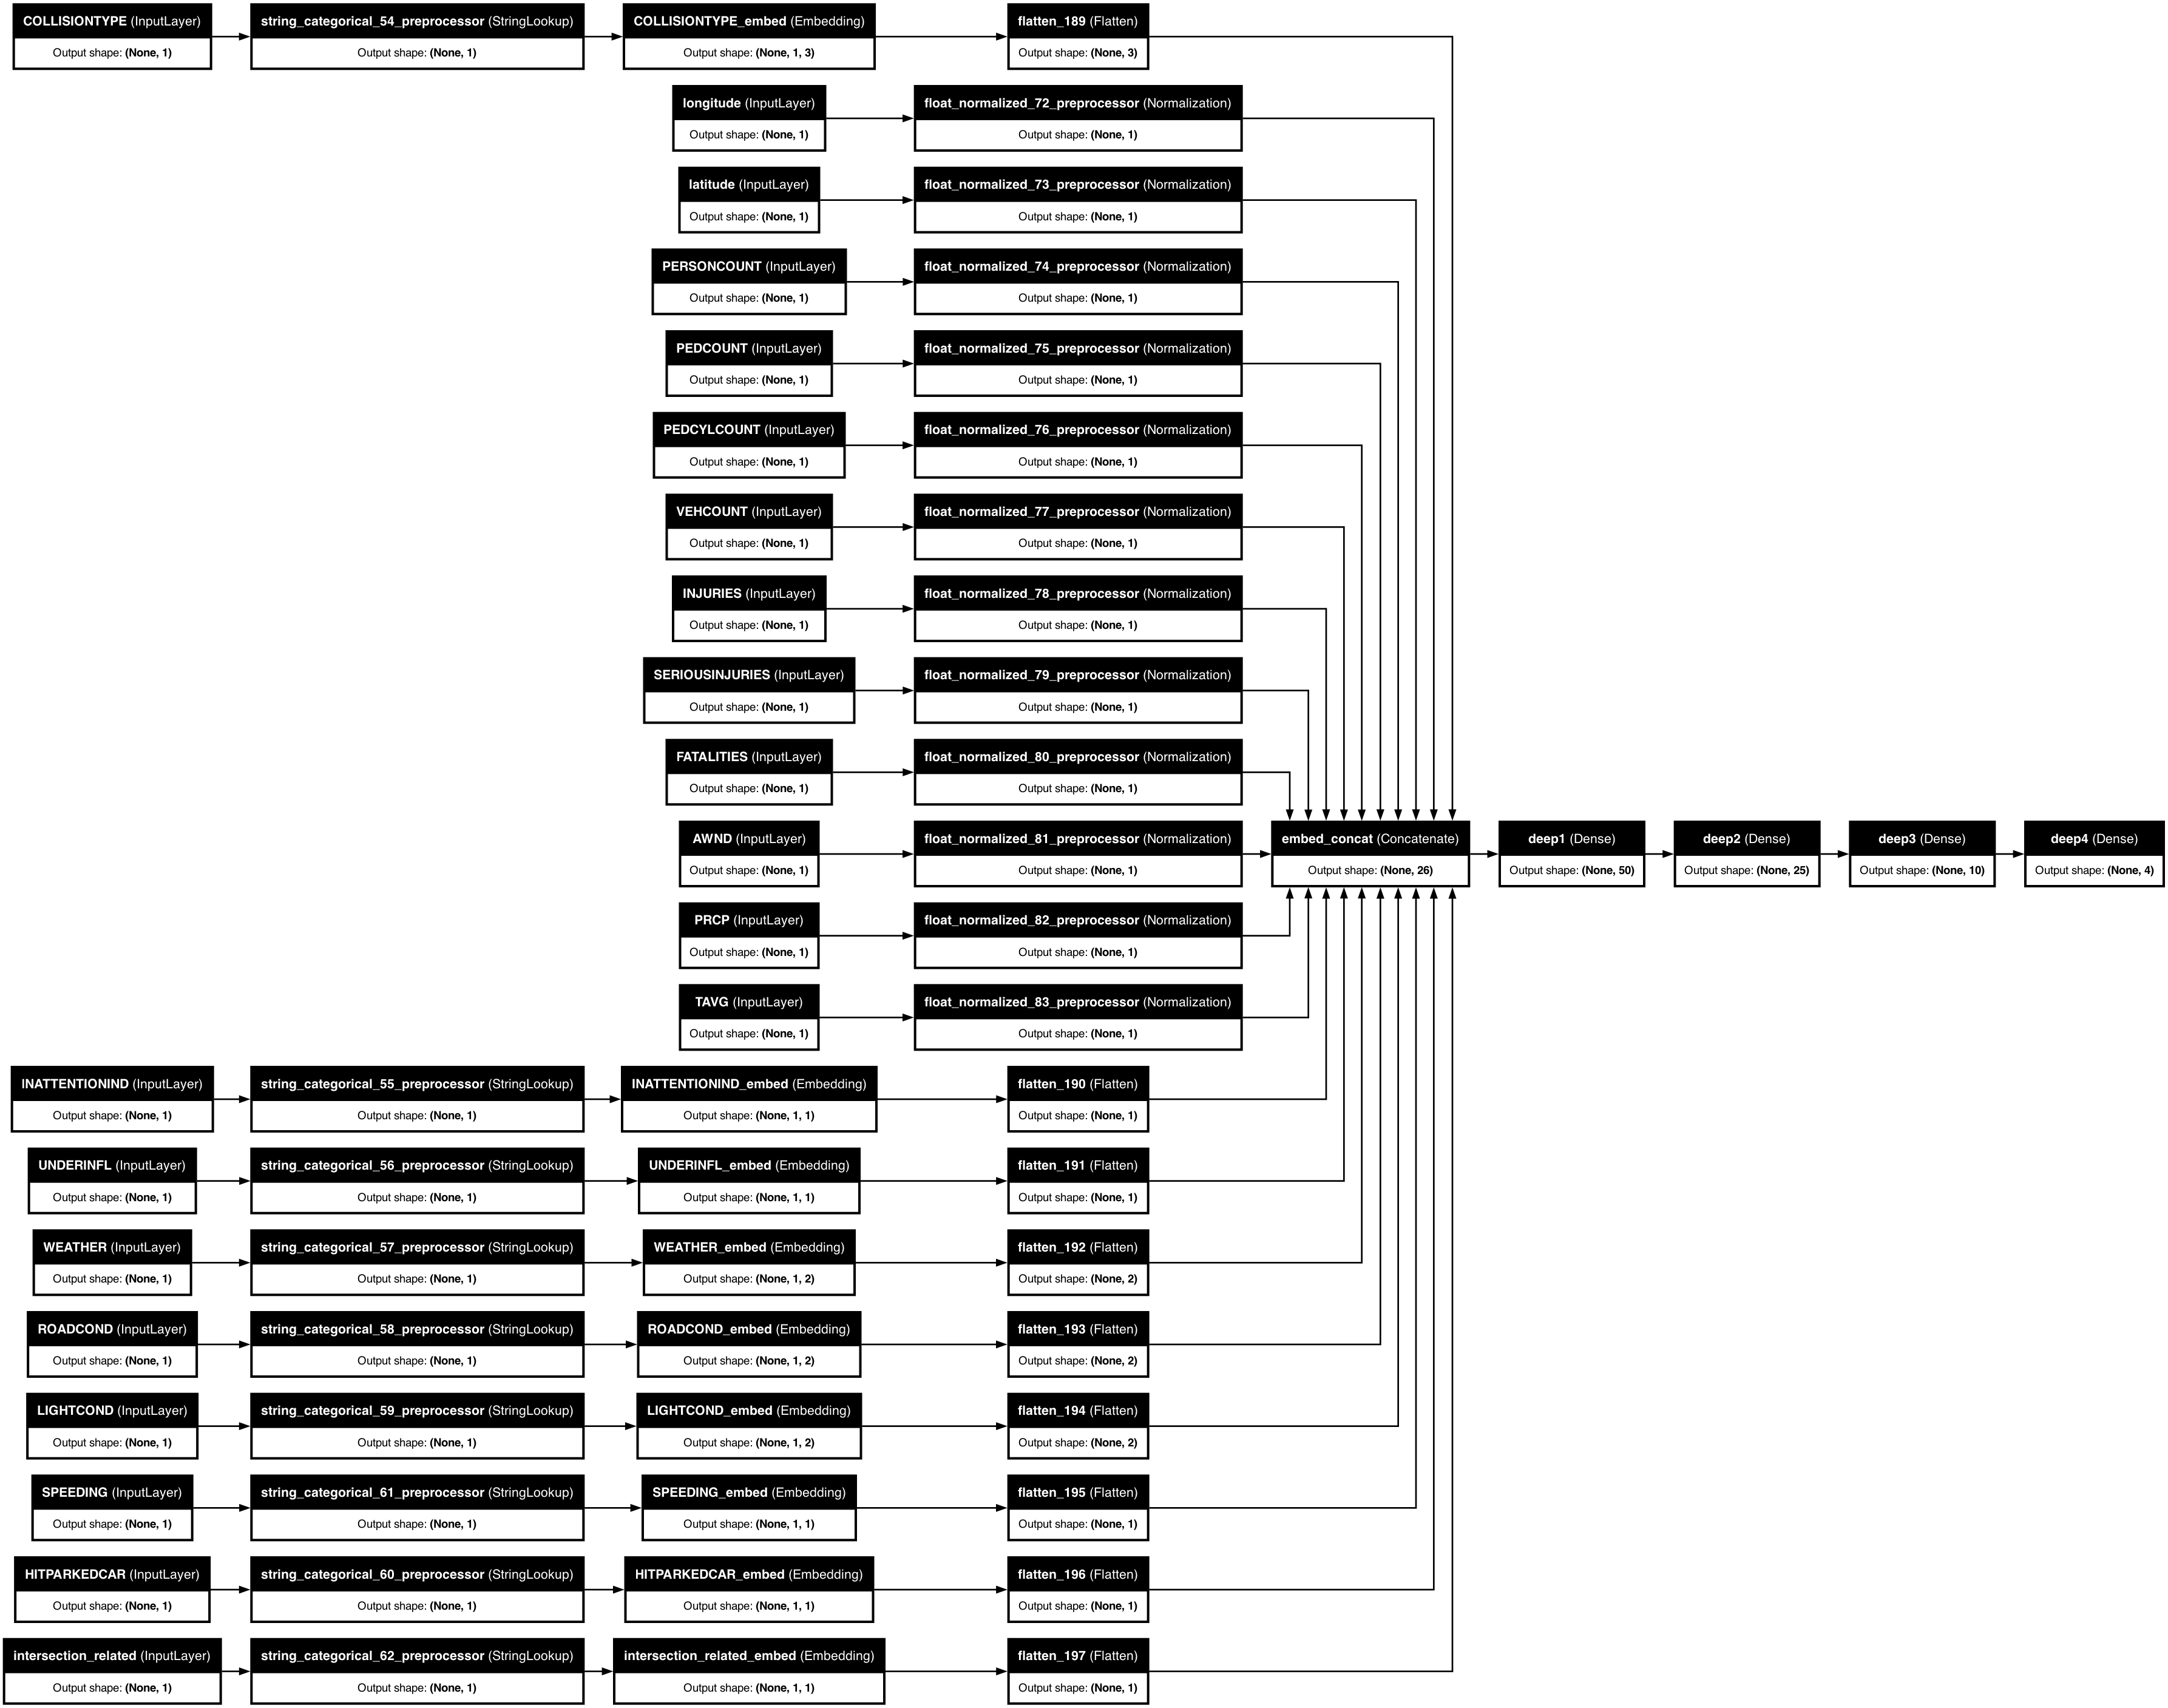

In [217]:
deep_branch3 = deep_branch
deep_branch3 = Dense(units=4,activation='softmax', name='deep4')(deep_branch3)

training_model4 = keras.Model(inputs=dict_inputs, outputs=deep_branch3)
training_model4.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

training_model4.summary()

plot_model(
    training_model4, to_file='model4.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [218]:
# saving each loss function at each epoch
history4 = training_model4.fit(
    ds_train, epochs = 10, validation_data = ds_test
)

Epoch 1/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8028 - loss: 8.0464 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 2/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 3.4003e-04
Epoch 3/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 5.9162e-04 - val_accuracy: 1.0000 - val_loss: 8.4777e-05
Epoch 4/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.8490e-04 - val_accuracy: 1.0000 - val_loss: 3.6143e-05
Epoch 5/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.0545e-04 - val_accuracy: 1.0000 - val_loss: 1.9783e-05
Epoch 6/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.7201e-05 - val_accuracy: 1.0000 - val_loss: 7.3202e-06
Epoch 7/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 6.3373e-06 - val_accuracy: 1.0000 - val_loss: 3.3173e-06
Epoch 8/10
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 3s 2

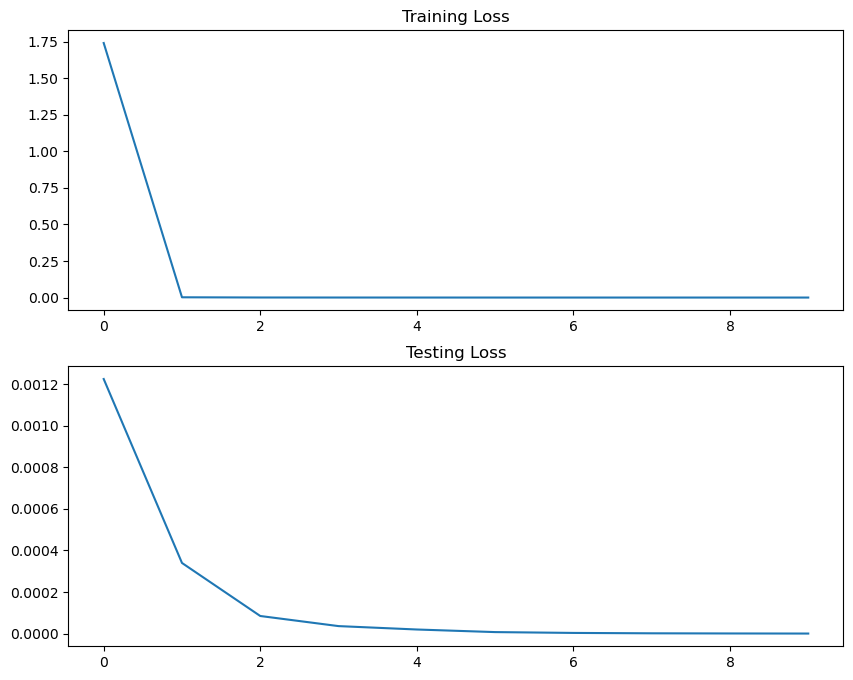

In [219]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history4.history["loss"])
plt.title("Training Loss")

plt.subplot(2,1,2)
plt.plot(history4.history["val_loss"])
plt.title("Testing Loss")

plt.show()

In [220]:
pred4 = training_model4.predict(ds_test)
yhat4 = np.argmax(pred4, axis = 1)

print(mt.classification_report(df_test["SEVERITYCODE"], yhat4))
mt.recall_score(df_test["SEVERITYCODE"], yhat4, average = "macro")

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00      7561
           2       1.00      1.00      1.00       382
           3       1.00      1.00      1.00        38

    accuracy                           1.00     22377
   macro avg       1.00      1.00      1.00     22377
weighted avg       1.00      1.00      1.00     22377



1.0

# Comparing performance of models 1, 2, and 3


In [221]:
def mcnemar(y, yhat1, yhat2):
    b = 0
    c = 0
    
    for i in range(len(y)):
        if yhat1[i] == yhat2[i]:
            continue
        if yhat1[i] == y[i]:
            b +=1
        else:
            c +=1
            
    m = ((np.abs(b-c) -1) ** 2)/(b+c) 
    print(m)
    # critical value for 95% confidence
    return m > 3.841

In [222]:
# model 1 vs model 2
mcnemar(df_test["SEVERITYCODE"], yhat, yhat2)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/894498750.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

In [223]:
# model 1 vs model 3
mcnemar(df_test["SEVERITYCODE"], yhat, yhat3)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/894498750.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

In [224]:
# model 2 vs model 3
mcnemar(df_test["SEVERITYCODE"], yhat2, yhat3)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/894498750.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

As displayed above, it can be seen that each of the 3 models have no different cells amoung them. This means that each of the three models are approximately the same. Therefore, when choosing the most superior of the 3 models we chose this based on run time. We chose Model 1 of Models 1, 2, and 3 because Model 1 was the fastest model so therefore better than the other two models. Because all of the models are 100% accuracy this means that both b and c in the mcnemar function are zero which results in a 0 in the denominator. This is exemplified by each of the mcnemar functions returning and printing 'True'. Dividing by 0 here means there is no difference between the two models being compared. Therefore, we fail to reject the null hypothesis and there was no significant difference between any of the models. 

# Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP).

In [225]:
# model 1 vs model 4
mcnemar(df_test["SEVERITYCODE"], yhat, yhat4)

inf


/var/folders/gx/xhl2hcf557x04tyzyjdg7lm40000gn/T/ipykernel_18748/894498750.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  m = ((np.abs(b-c) -1) ** 2)/(b+c)


True

Our best wide and deep network was Model 1 because it was the fastest. So, here we are using the mcnemar test to compare Model 1 to Model 4 which is just a standard MPL. Before we performed the mcnemar test on these two models we knew what the result was going to be because of the previosu results we got using the mcnemar test on the first 3 models. This test returned 'True' as expected because both b and c are 0. Therefore, we fail to reject the null hypothesis and there was no significant difference between Model 1 and Model 4. 

# Exceptional Work

Code for the exceptional work was from TensorFlow.com, StackOverflow, and then ChatGPT was used to help combine the info that we got from those websites.

In [232]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense

def create_emb_layer(input_tensor, num_categories, name):
    embedding = Embedding(input_dim=num_categories, output_dim=2, input_length=1, name=name+'_embed')(input_tensor)
    flattened_embedding = Flatten()(embedding)
    return flattened_embedding

# Define input layer
inputs = Input(shape=(len(categorical_headers),))

# List to store embedding layers
embedding_layers = []

# Iterate through categorical variables
for i, col in enumerate(categorical_headers):
    # Get the vocabulary size for the current categorical feature
    num_categories = len(feature_space.preprocessors[col].get_vocabulary())
    # Create an embedding layer for the current categorical feature
    emb_layer = create_emb_layer(inputs[:, i:i+1], num_categories, col)
    embedding_layers.append(emb_layer)

# Concatenate all embedding layers
emb_concat = Concatenate(name='embed_concat')(embedding_layers)

# Final dense layer
final_dense = Dense(units=4, activation='softmax', name='combined')(emb_concat)

# Define the model
training_model_emb = Model(inputs=inputs, outputs=final_dense)

# Compile the model
training_model_emb.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

# Display model summary
training_model_emb.summary()



/Users/Jocelyn/anaconda3/envs/JRenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_18         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_19         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_20         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_21         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_22         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_23         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_24         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_25         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_26         │ (None, 1)         │          0 │ input_layer_2[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ COLLISIONTYPE_embed │ (None, 1, 2)      │         18 │ get_item_18[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ INATTENTIONIND_emb… │ (None, 1, 2)      │          4 │ get_item_19[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNDERINFL_embed     │ (None, 1, 2)      │          4 │ get_item_20[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WEATHER_embed       │ (None, 1, 2)      │         16 │ get_item_21[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROADCOND_embed      │ (None, 1, 2)      │         14 │ get_item_22[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LIGHTCOND_embed     │ (None, 1, 2)      │          8 │ get_item_23[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SPEEDING_embed      │ (None, 1, 2)      │          4 │ get_item_24[0][0

 Total params: 152 (608.00 B)

 Trainable params: 152 (608.00 B)

 Non-trainable params: 0 (0.00 B)

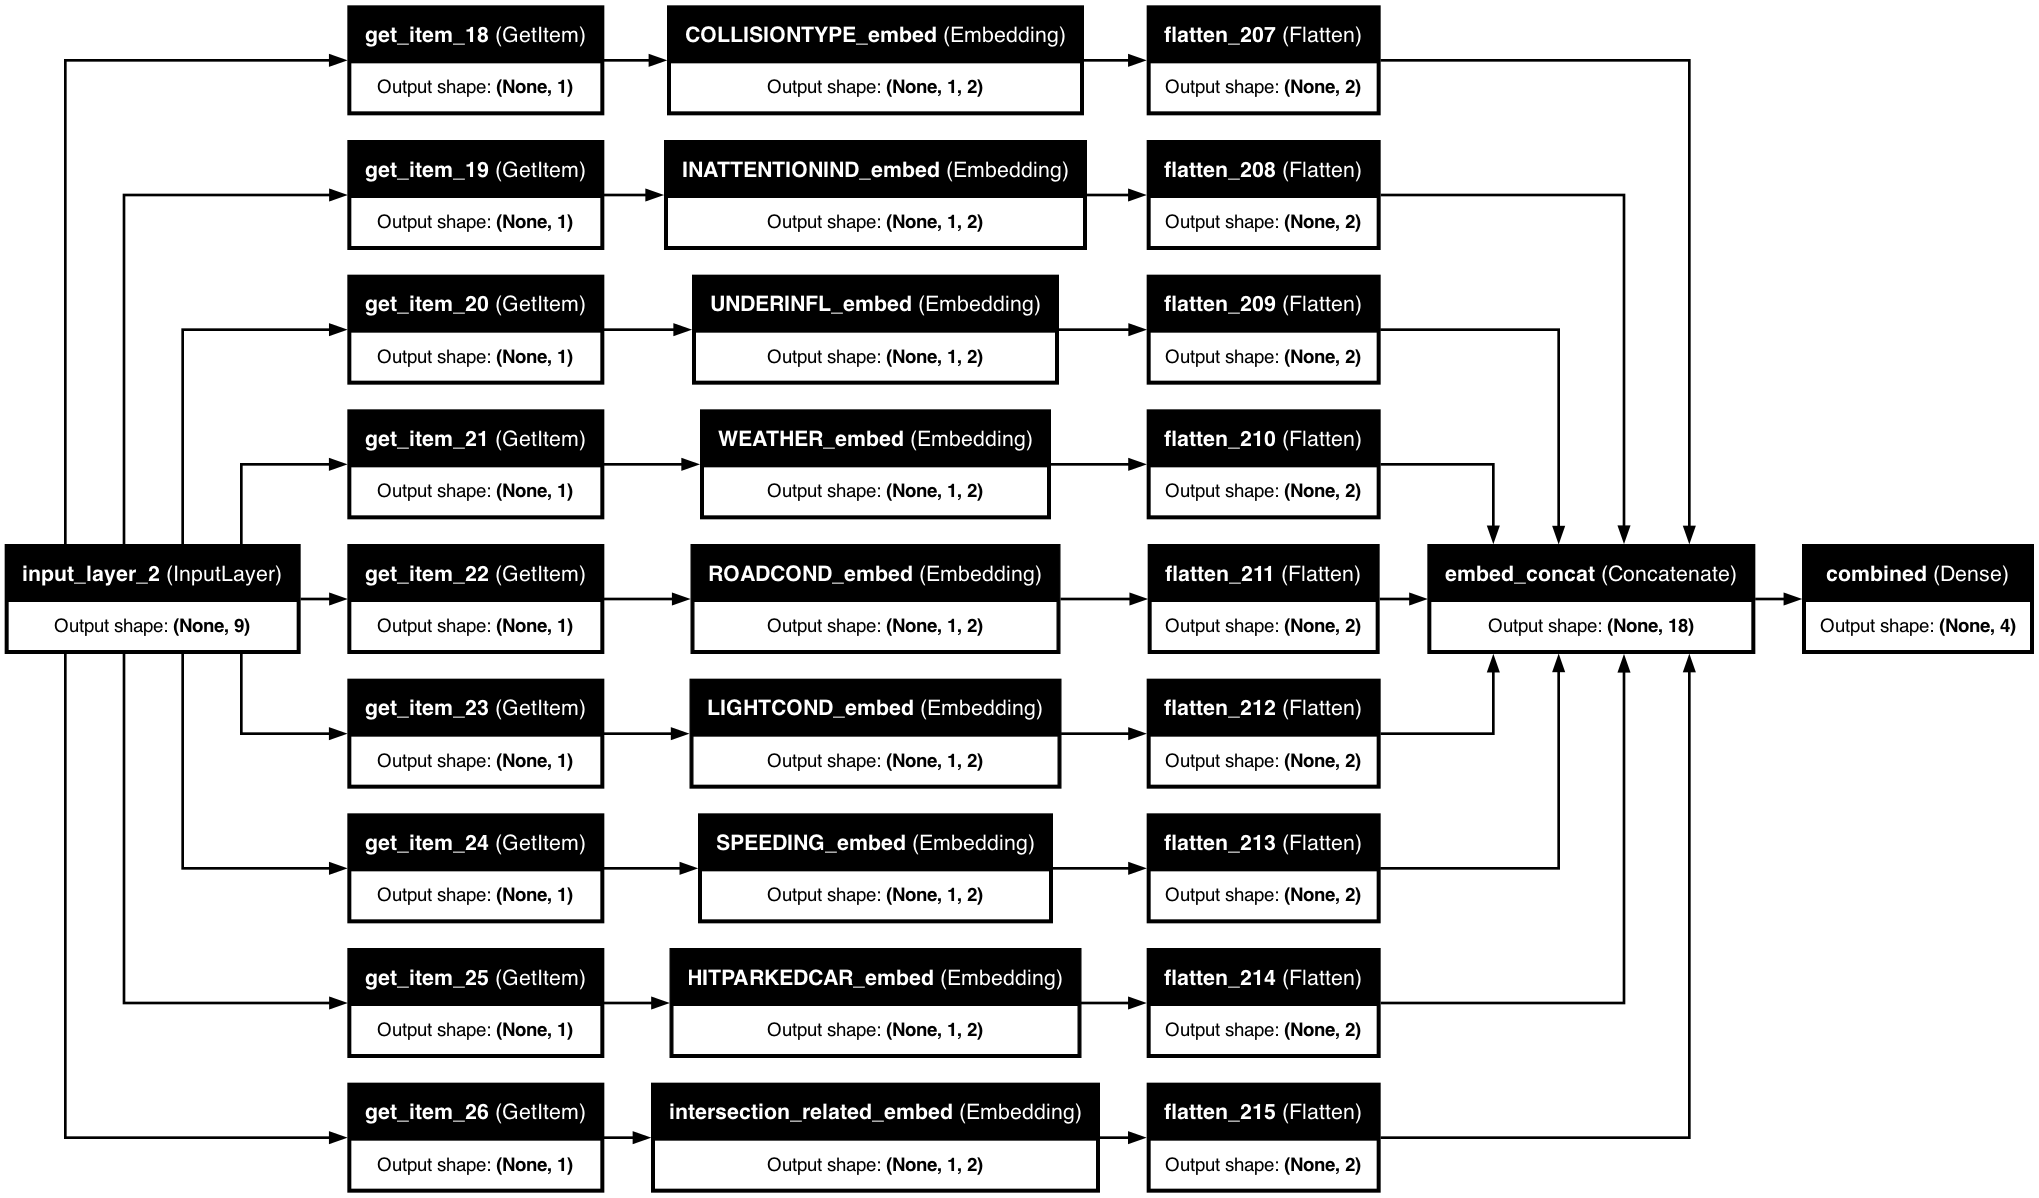

In [233]:
# visualize keras model 
plot_model(
    training_model_emb, to_file='model_emb.png', show_shapes = True, show_layer_names = True, 
    rankdir='LR', expand_nested = False, dpi= 96
)

In [234]:
# extract the learned embedding weights for each categorical feature from teh Keras model 
# store all learned embedding weights in emb_weights
emb_weights = []

# iterate through column names
for col in categorical_headers:
    # name each layer
    layer = col + "_embed"
    w = training_model_emb.get_layer(layer).get_weights()[0]
    emb_weights.append(w)

# print learned emb weights    
emb_weights

[array([[ 0.02899823,  0.03598999],
        [-0.00141849, -0.04460405],
        [ 0.03589464, -0.03450678],
        [-0.04897734,  0.02564811],
        [-0.02166841, -0.04502379],
        [-0.00743426, -0.01471693],
        [ 0.011357  ,  0.02179363],
        [ 0.04262048, -0.00978906],
        [-0.01687975,  0.03502839]], dtype=float32),
 array([[ 0.03976176, -0.01411387],
        [-0.03142266,  0.01566753]], dtype=float32),
 array([[ 0.03491693,  0.02372747],
        [-0.02506509, -0.01996648]], dtype=float32),
 array([[ 0.03495992, -0.04648638],
        [ 0.02985244,  0.04905465],
        [-0.01588147, -0.00467385],
        [ 0.02698009,  0.01596694],
        [-0.04216927,  0.03785587],
        [-0.02299466, -0.00134082],
        [-0.02617762,  0.02169463],
        [ 0.00931908, -0.04275814]], dtype=float32),
 array([[-0.02169349, -0.03440778],
        [-0.03371563, -0.04838517],
        [ 0.02711819, -0.04872252],
        [ 0.02141105, -0.03505299],
        [ 0.02547682, -0.0496442

In [235]:
import pandas as pd

# Extracting weights and categories using list comprehensions and zip
weights_1D = [weight[0] for weights in emb_weights for weight in weights]
weights_2D = [weight[1] for weights in emb_weights for weight in weights]
f = ["{}_{}".format(categorical_headers[i], category) 
     for i, weights in enumerate(emb_weights) 
     for category in feature_space.preprocessors[categorical_headers[i]].get_vocabulary()]

# Creating DataFrame directly from the extracted data
df_embs = pd.DataFrame({
    "Embedding 1": weights_1D,
    "Embedding 2": weights_2D,
    "feature_category": f
})

# Displaying the DataFrame
df_embs


Embedding 1  Embedding 2                  feature_category
0      0.028998     0.035990              COLLISIONTYPE_Angles
1     -0.001418    -0.044604          COLLISIONTYPE_Parked Car
2      0.035895    -0.034507          COLLISIONTYPE_Rear Ended
3     -0.048977     0.025648           COLLISIONTYPE_Sideswipe
4     -0.021668    -0.045024           COLLISIONTYPE_Left Turn
5     -0.007434    -0.014717          COLLISIONTYPE_Pedestrian
6      0.011357     0.021794              COLLISIONTYPE_Cycles
7      0.042620    -0.009789          COLLISIONTYPE_Right Turn
8     -0.016880     0.035028             COLLISIONTYPE_Head On
9      0.039762    -0.014114              INATTENTIONIND_False
10    -0.031423     0.015668               INATTENTIONIND_True
11     0.034917     0.023727                   UNDERINFL_False
12    -0.025065    -0.019966                    UNDERINFL_True
13     0.034960    -0.046486                     WEATHER_Clear
14     0.029852     0.049055                   WEATHER_Raining
15    -0.015881    -0.004674                  WEATHER_Overcast
16     0.026980     0.015967                   WEATHER_Snowing
17    -0.042169     0.037856            WEATHER_Fog/Smog/Smoke
18    -0.022995    -0.001341  WEATHER_Sleet/Hail/Freezing Rain
19    -0.026178     0.021695         WEATHER_Blowing Sand/Dirt
20     0.009319    -0.042758          WEATHER_Severe Crosswind
21    -0.021693    -0.034408                      ROADCOND_Dry
22    -0.033716    -0.048385                      ROADCOND_Wet
23     0.027118    -0.048723                      ROADCOND_Ice
24     0.021411    -0.035053               ROADCOND_Snow/Slush
25     0.025477    -0.049644           ROADCOND_Standing Water
26     0.047007     0.030651            ROADCOND_Sand/Mud/Dirt
27    -0.010656     0.026140                      ROADCOND_Oil
28    -0.020088    -0.034303                       LIGHTCOND_3
29    -0.024725    -0.044431                       LIGHTCOND_1
30    -0.020603     0.004466                       LIGHTCOND_2
31     0.010721     0.014438                       LIGHTCOND_0
32     0.011644    -0.028412                    SPEEDING_False
33    -0.042915     0.032387                     SPEEDING_True
34     0.018553    -0.042649                HITPARKEDCAR_False
35     0.048715     0.023482                 HITPARKEDCAR_True
36    -0.033449    -0.022737        intersection_related_False
37    -0.024390     0.012064         intersection_related_True

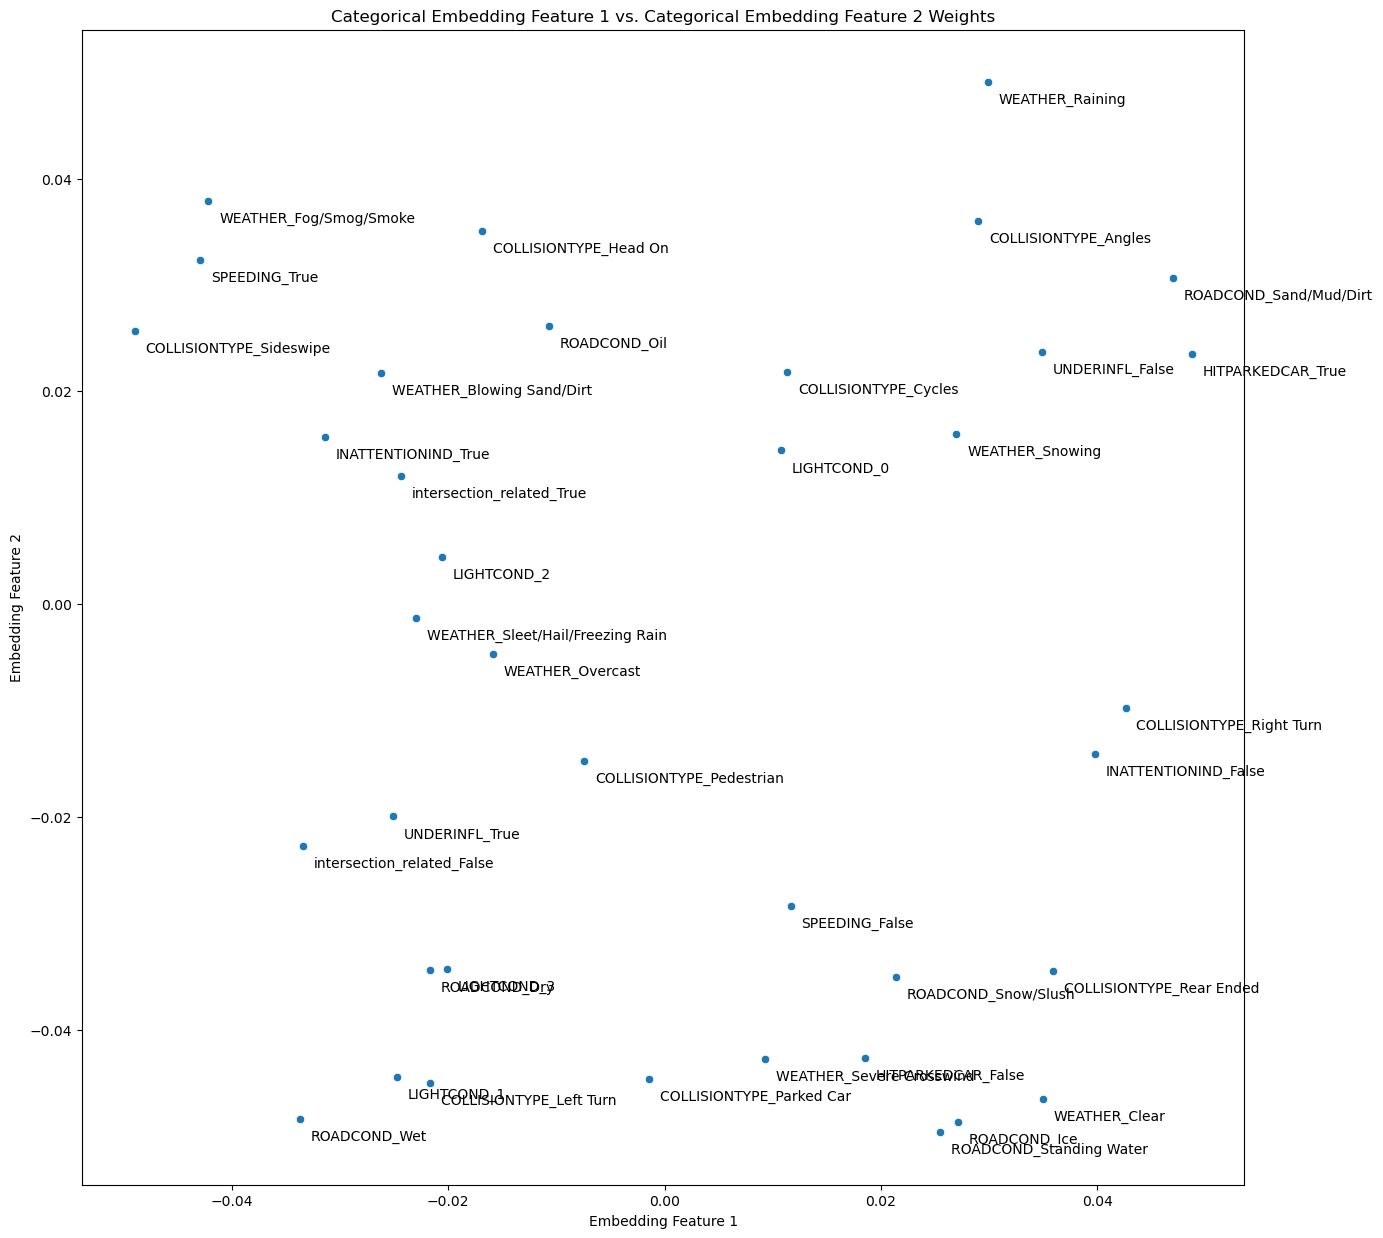

In [236]:
import seaborn as sns
# code for scatterplot was provided by StackOverflow then altered with ChatGPT and we altered it further from there

plt.figure(figsize = (15, 15))
p1 = sns.scatterplot(
    x='Embedding 1',
    y='Embedding 2',
    data=df_embs, 
    legend = False
)

for line in range(0, df_embs.shape[0]):
    p1.text(
        df_embs["Embedding 1"][line]+0.001,
        df_embs["Embedding 2"][line]-0.002, 
        df_embs["feature_category"][line], 
        horizontalalignment = 'left', 
        size = 'medium',
        color = 'black'
    )
    
plt.title('Categorical Embedding Feature 1 vs. Categorical Embedding Feature 2 Weights')
plt.xlabel('Embedding Feature 1')
plt.ylabel('Embedding Feature 2')

plt.show()

This scatterplot provides a visual representation of embeddings learned from the categorical features of our dataset. Variables that are grouped together on the graph are variables that tend to have correlation between each other and similar results, in our case Severity Codes. For example, the three variables grouped togehter in the middle of the graph are Speeding = True, Road Condition = Wet, and Under the Influence = True. This means that accidents that involved speeding, wet roads, and drivers that were under the influence mostly resulted in the same Severity Code score. 